In [2]:
import nltk, re, pprint
from urllib import request
from collections import Counter
import numpy as np
url = 'https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')

# Data Cleaning

The next few commands are used to clean the data. The beginning and the end of the text file contains unimportant data which is removed. The license is present in multiple places, and all instances of it are removed.

In [3]:
raw.replace('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\nSHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS\nPROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE\nWITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE\nDISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS\nPERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED\nCOMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY\nSERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', '')

'This is the 100th Etext file presented by Project Gutenberg, and\nis presented in cooperation with World Library, Inc., from their\nLibrary of the Future and Shakespeare CDROMS.  Project Gutenberg\noften releases Etexts that are NOT placed in the Public Domain!!\n\nShakespeare\n\n*This Etext has certain copyright implications you should read!*\n\n\n\n*Project Gutenberg is proud to cooperate with The World Library*\nin the presentation of The Complete Works of William Shakespeare\nfor your reading for education and entertainment.  HOWEVER, THIS\nIS NEITHER SHAREWARE NOR PUBLIC DOMAIN. . .AND UNDER THE LIBRARY\nOF THE FUTURE CONDITIONS OF THIS PRESENTATION. . .NO CHARGES MAY\nBE MADE FOR *ANY* ACCESS TO THIS MATERIAL.  YOU ARE ENCOURAGED!!\nTO GIVE IT AWAY TO ANYONE YOU LIKE, BUT NO CHARGES ARE ALLOWED!!\n\n\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\n\n**Etexts Readable By Both Humans and By Computers, Since 1971**\n\n*These Etexts Prepared By Hundreds of Voluntee

In [4]:
t = nltk.sent_tokenize(raw)
for i in range(66):
    t.pop(0)
for i in range(3):
    t.pop(-1)

In [5]:
tt = ' '.join(sentence for sentence in t)

In [6]:
tokens = nltk.tokenize.word_tokenize(tt)
lower_tokens = []
for token in tokens:
    lower_tokens.append(token.lower())

for i in range(0, 20):
    lower_tokens.pop(0)
types = {}

for word in tokens:
    try:
        types[word] = types[word] + 1
    except:
        types[word] = 1


lower_types = {}

for word in lower_tokens:
    try:
        lower_types[word] = lower_types[word] + 1
    except:
        lower_types[word] = 1

# TTR

In [7]:
TTR = len(types)/len(tokens)
print(TTR)

0.03126762833427351


In [8]:
from collections import OrderedDict
sorted_types = OrderedDict(sorted(lower_types.items(), key=lambda t: t[1]))

In [9]:
dict_keys = list((sorted_types.keys()))
val_list = []
for i in range(len(dict_keys)):
    val_list.append(sorted_types[dict_keys[i]])
rank_list = list(range(1, len(dict_keys) + 1))
rank_list.reverse()

unique_values = list(set(lower_types.values()))
rank_list = []
rank = 590
length = []
tmp = 0
for i in range(len(dict_keys)):
    if i == 0:
        rank_list.append(rank)
        
    else:
        if sorted_types[dict_keys[i]] == sorted_types[dict_keys[i-1]]:
            rank_list.append(rank)
        else:
            rank = rank - 1
            rank_list.append(rank)

# Zipf's Law (Frequency vs. Rank Plot)

Populating the interactive namespace from numpy and matplotlib


/Users/ritikdutta/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rank']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


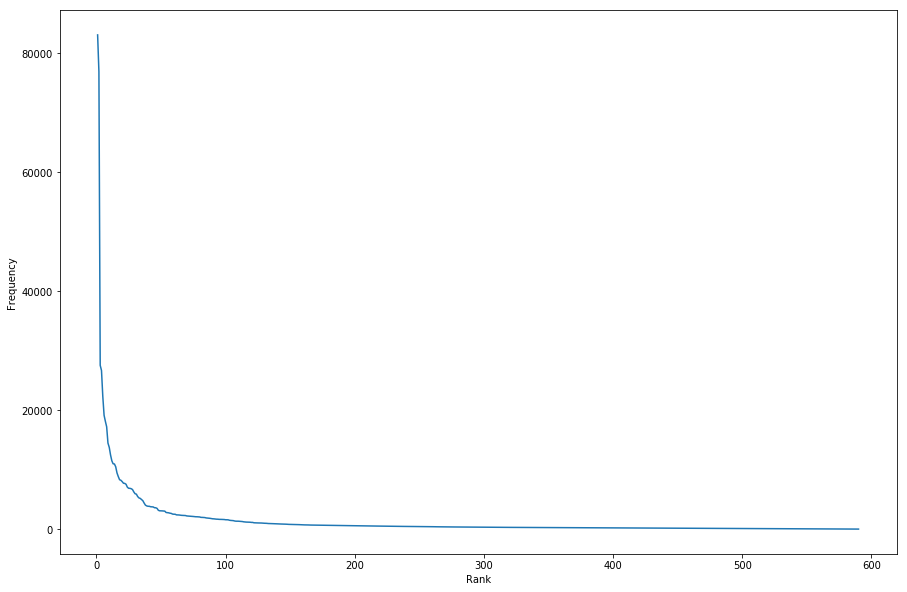

In [10]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)


plt.plot(rank_list, val_list)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [19]:
"""length = []
tmp = 0

let = {}
let1 = {}
for key in sorted_types.keys():
    try:
        let[sorted_types[key]] = let[sorted_types[key]] + len(key)
        let1[sorted_types[key]] += 1
    except:
        let[sorted_types[key]] = len(key)
        let1[sorted_types[key]] = 1
for key in let.keys():
    let[key] = let[key]/let1[key]"""

'length = []\ntmp = 0\n\nlet = {}\nlet1 = {}\nfor key in sorted_types.keys():\n    try:\n        let[sorted_types[key]] = let[sorted_types[key]] + len(key)\n        let1[sorted_types[key]] += 1\n    except:\n        let[sorted_types[key]] = len(key)\n        let1[sorted_types[key]] = 1\nfor key in let.keys():\n    let[key] = let[key]/let1[key]'

# Zipf's Law (Frequency vs. Length of word Plot)

{16: 1.064516129032258, 7: 11.449135090609555, 10: 4.639296187683285, 5: 32.380135973987585, 8: 7.820607175712971, 6: 15.910934744268078, 13: 1.5335892514395393, 11: 3.488681757656458, 9: 5.909546258102534, 4: 96.7559718969555, 12: 2.3672806067172263, 2: 795.5233644859813, 18: 1.125, 14: 1.8007662835249043, 3: 263.6255144032922, 15: 1.4189189189189189, 17: 1.1176470588235294, 19: 1.0, 1: 5784.046511627907, 21: 1.0, 36: 1.0, 24: 1.0, 20: 1.0, 22: 1.0, 27: 1.0, 23: 1.0}
OrderedDict([(19, 1.0), (21, 1.0), (36, 1.0), (24, 1.0), (20, 1.0), (22, 1.0), (27, 1.0), (23, 1.0), (16, 1.064516129032258), (17, 1.1176470588235294), (18, 1.125), (15, 1.4189189189189189), (13, 1.5335892514395393), (14, 1.8007662835249043), (12, 2.3672806067172263), (11, 3.488681757656458), (10, 4.639296187683285), (9, 5.909546258102534), (8, 7.820607175712971), (7, 11.449135090609555), (6, 15.910934744268078), (5, 32.380135973987585), (4, 96.7559718969555), (3, 263.6255144032922), (2, 795.5233644859813), (1, 5784.04651

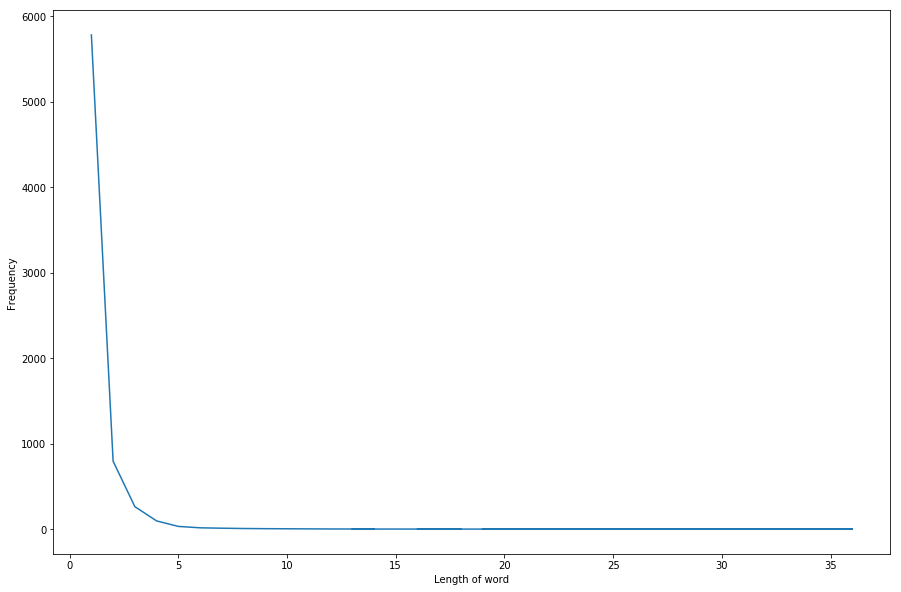

In [14]:
new_length = []
for key in sorted_types.keys():
    if len(key) not in new_length:
        new_length.append(len(key))
new_freq = {}
new_freq_num = {}
for key in sorted_types.keys():
    try:
        new_freq[len(key)] = new_freq[len(key)] + sorted_types[key]
        new_freq_num[len(key)] = new_freq_num[len(key)] + 1
    except:
        new_freq[len(key)] = sorted_types[key]
        new_freq_num[len(key)] = 1
        
for key in new_freq.keys():
    new_freq[key] = new_freq[key]/new_freq_num[key]


new_freq_sorted = OrderedDict(sorted(new_freq.items(), key=lambda t: t[1]))
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
plt.plot(new_freq_sorted.keys(), new_freq_sorted.values())
plt.xlabel('Length of word')
plt.ylabel('Frequency')
plt.show()

# Zipf's Law (Number of meanings vs. Frequency Scatter Plot)

For this plot, a few tokens from the corpus were picked and plotted.

| Number of meanings | Frequency |
|--------------------|-----------|
| 2                  | 1         |
| 3                  | 10        |
| 5                  | 25        |
| 8                  | 50        |
| 8                  | 100       |
| 9                  | 250       |
| 7                  | 1050      |
| 8                  | 3897      |
| 7                  | 4962      |
| 10                 | 8206      |
| 8                  | 19131     |


# When does Zipf's Law not hold true?

According to [Ryland Williams J et. al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4531284/), Zipf's Law holds true for phrases, and not for words.

Populating the interactive namespace from numpy and matplotlib


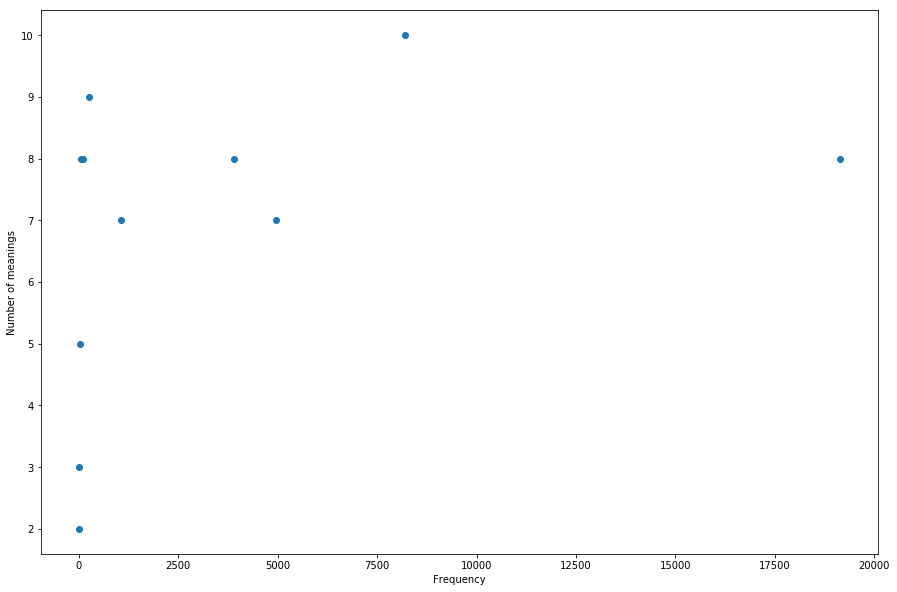

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
plt.scatter([1, 10, 25, 50, 100, 250, 1050, 3897, 4962, 8206, 19131], [2,3,5,8,8,9,7,8,7,10,8])
plt.xlabel('Frequency')
plt.ylabel('Number of meanings')
plt.show()

# Heap's Law
The Heap's Law is plotted below. The parameters of the curve are estimated using the Scipy function curve_fit. The function arrived at using the estimated parameters is then plotted.

Populating the interactive namespace from numpy and matplotlib


/Users/ritikdutta/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


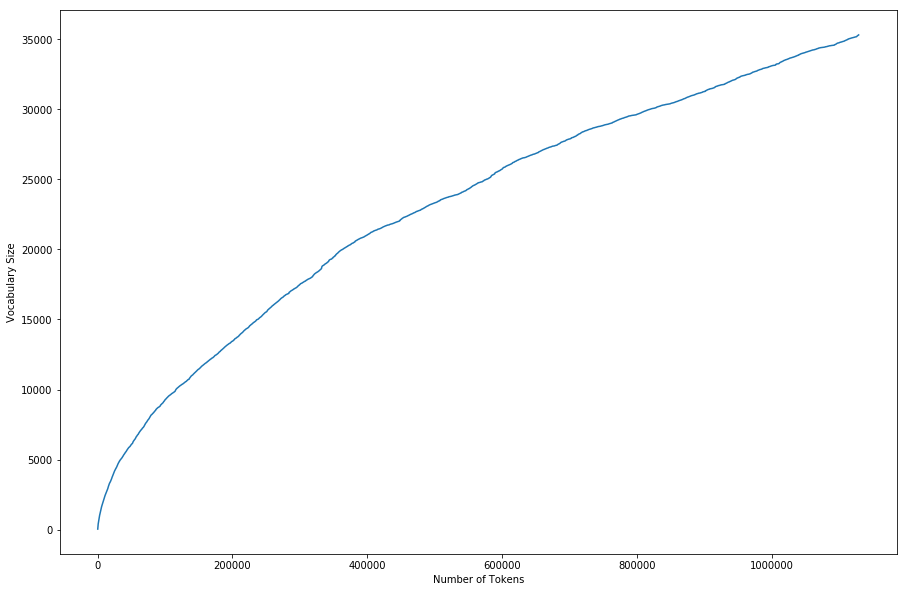

In [16]:
text = ''
token_count = 0
ttypes = []
type_count = 0
x = []
y = []
for sentence in t:
    new_tokens = nltk.tokenize.word_tokenize(sentence)
    token_count = token_count + len(new_tokens)
    for temp in new_tokens:
        if temp not in ttypes:
            type_count = type_count + 1
            ttypes.append(temp)
    x.append(token_count)
    y.append(type_count)
    
    
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
plt.plot(x, y)
plt.xlabel('Number of Tokens')
plt.ylabel('Vocabulary Size')
plt.show()   
    

[19.20550823  0.54005643]
Populating the interactive namespace from numpy and matplotlib


/Users/ritikdutta/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


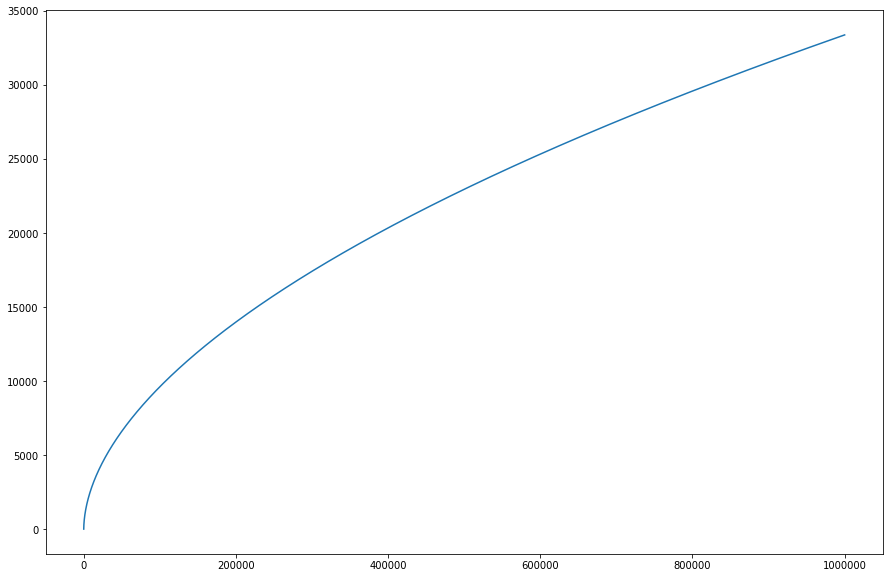

In [18]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*(x)**b

popt, pcov = curve_fit(func, x, y)
print(popt)

def func1(x):
    return 19.205*(x)**0.54

xx = list(range(1, 1000000))
yy = []
for e in xx:
    yy.append(func1(e))

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
plt.plot(xx, yy)
plt.show()

